In [2]:
import tools
import pandas as pd
from ydata_profiling import ProfileReport
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
# Load traffic data
traffic_df = pd.read_csv('data/processed/traffic_data_lausanne.csv')
traffic_df.set_index('Date', inplace=True)



In [29]:
# Load trafic data from 2018 to 2023
trafic_loader = tools.Tools("data/raw/ASTRA_Bulletins_2018-2023")
traffic_df = trafic_loader.load_traffic_data('507')
# append to this df the data from the folder "data/raw/ASTRA_Bulletins_pre_2018"
trafic_loader = tools.Tools("data/raw/ASTRA_Bulletins_pre_2018")
traffic_df_pre_2018 = trafic_loader.load_traffic_data_pre_2018('507')
traffic_df = pd.concat([traffic_df_pre_2018, traffic_df], ignore_index=True)
print(traffic_df.head())
print("Trafic data loaded successfully")

Looking for files in: data/raw/ASTRA_Bulletins_2018-2023
Excel files: ['data/raw/ASTRA_Bulletins_2018-2023/ID24_Bulletin_2019_de.xlsx', 'data/raw/ASTRA_Bulletins_2018-2023/ID21_Bulletin_2022_de.xlsx', 'data/raw/ASTRA_Bulletins_2018-2023/ID25_Bulletin_2018_de.xlsx', 'data/raw/ASTRA_Bulletins_2018-2023/ID23_Bulletin_2020_12_de.xlsx', 'data/raw/ASTRA_Bulletins_2018-2023/ID20_Bulletin_2023_de.xlsx', 'data/raw/ASTRA_Bulletins_2018-2023/ID22_Jahresergebnisse 2021.xlsx']
Read Excel succesful: data/raw/ASTRA_Bulletins_2018-2023/ID24_Bulletin_2019_de.xlsx
Error reading file data/raw/ASTRA_Bulletins_2018-2023/ID21_Bulletin_2022_de.xlsx: Defining usecols with out-of-bounds indices is not allowed. [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17] are out-of-bounds. (sheet: DTV)
Read Excel succesful: data/raw/ASTRA_Bulletins_2018-2023/ID25_Bulletin_2018_de.xlsx
Error reading file data/raw/ASTRA_Bulletins_2018-2023/ID23_Bulletin_2020_12_de.xlsx: Defining usecols with out-of-bounds indices is not allowed.

In [42]:
traffic_df

,Date,Traffic,Month
0,2011-01-31,40705.903226,2011-01
1,2011-02-28,45105.464286,2011-02
2,2011-03-31,47475.548387,2011-03
3,2011-04-30,52911.933333,2011-04
4,2011-05-31,51792.580645,2011-05
...,...,...,...
117,2023-08-31,65175.548387,2023-08
118,2023-09-30,64773.566667,2023-09
119,2023-10-31,59994.935484,2023-10
120,2023-11-30,52953.200000,2023-11


In [38]:
# Load CO data
df = pd.read_csv('data/raw/ID38_CO.csv', delimiter=';', skiprows=6, names=["Date", "Lausanne", "Lugano", "Payerne"], parse_dates=["Date"])
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')  # handle odd formats
#df.set_index('Date', inplace=True)
co_monthly = df
#co_monthly= df.resample('M').mean(numeric_only=True)
# co_monthly.index = co_yearly.index.yearmonth  # convert datetime index to just the month



In [43]:
co_monthly

,Date,Lausanne,Lugano,Payerne,Month
0,2000-01-01,0.95,0.96,0.47,2000-01
1,2000-01-02,0.97,1.08,0.46,2000-01
2,2000-01-03,1.24,1.39,0.36,2000-01
3,2000-01-04,1.41,1.58,0.52,2000-01
4,2000-01-05,1.70,1.68,0.52,2000-01
...,...,...,...,...,...
9237,2025-04-16,0.23,0.28,0.15,2025-04
9238,2025-04-17,0.24,0.26,0.16,2025-04
9239,2025-04-18,0.22,0.23,0.16,2025-04
9240,2025-04-19,0.24,0.25,0.18,2025-04


In [40]:
traffic_df['Date'] = pd.to_datetime(traffic_df['Date'], errors='coerce')
co_monthly['Date'] = pd.to_datetime(co_monthly['Date'], errors='coerce')
traffic_df['Month'] = traffic_df['Date'].dt.to_period('M')
co_monthly['Month'] = co_monthly['Date'].dt.to_period('M')


In [ ]:
combined_df = pd.merge(traffic_df, co_monthly, on='Month', how='outer')  # or 'outer' if you want all months


  Date_x  Traffic    Month     Date_y  Lausanne  Lugano  Payerne
0    NaT      NaN  2000-01 2000-01-01      0.95    0.96     0.47
1    NaT      NaN  2000-01 2000-01-02      0.97    1.08     0.46
2    NaT      NaN  2000-01 2000-01-03      1.24    1.39     0.36
3    NaT      NaN  2000-01 2000-01-04      1.41    1.58     0.52
4    NaT      NaN  2000-01 2000-01-05      1.70    1.68     0.52


In [53]:

#combined_df = traffic_df.join(co_monthly, how='inner') # or 'outer' if you want all years
print(combined_df.head())


        Date_x  Traffic     Date_y  Lausanne  Lugano  Payerne
Month                                                        
2000-01    NaT      NaN 2000-01-01      0.95    0.96     0.47
2000-01    NaT      NaN 2000-01-02      0.97    1.08     0.46
2000-01    NaT      NaN 2000-01-03      1.24    1.39     0.36
2000-01    NaT      NaN 2000-01-04      1.41    1.58     0.52
2000-01    NaT      NaN 2000-01-05      1.70    1.68     0.52


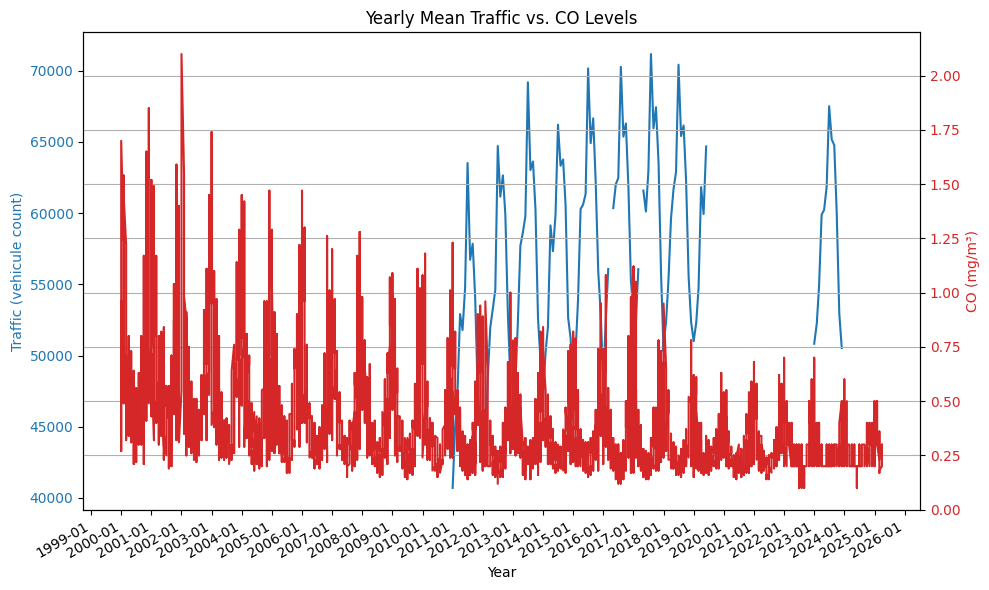

In [59]:
import matplotlib.dates as mdates
# combined_df.set_index('Month', inplace=True)
#combined_df.index = combined_df.index.to_timestamp()

fig, ax1 = plt.subplots(figsize=(10, 6))

# Traffic plot
ax1.set_xlabel('Year')
ax1.set_ylabel('Traffic (vehicule count)', color='tab:blue')
ax1.plot(combined_df.index, combined_df['Traffic'], label='Traffic', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Format x-axis to show year-month
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.YearLocator())  # Optional: show every year
fig.autofmt_xdate()  # Rotate dates

# CO plot
ax2 = ax1.twinx()
ax2.set_ylabel('CO (mg/m³)', color='tab:red')
ax2.plot(combined_df.index, combined_df['Lugano'], label='CO (mg / m³)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Yearly Mean Traffic vs. CO Levels')
plt.grid(True)
plt.tight_layout()
plt.show()
